# Exploratory Data Analysis 

In [4]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [5]:
data = pd.read_csv('salary_data_cleaned.csv')

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data scientist'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'


def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principle' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'


In [7]:
data['job_simplfier'] = data['Job Title'].apply(title_simplifier)
data['seniority'] = data['Job Title'].apply(seniority)

data.job_simplfier.value_counts(),data.seniority.value_counts()

(data scientist    398
 na                184
 analyst           102
 manager            22
 mle                22
 director           14
 Name: job_simplfier, dtype: int64,
 na        545
 senior    195
 jr          2
 Name: seniority, dtype: int64)

In [8]:
data['job_state'] = data.job_state.apply(lambda x: x.strip() 
                                         if x.strip().lower() != 'los angeles' else 'CA')

data.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [9]:
# Job description length
data['desc_len'] = data['Job Description'].apply(lambda x: len(x))

In [10]:
# Competitors count
data['num_comp'] = data['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [11]:
data.num_comp

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [12]:
data['min_salary'] = data.apply(
    lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)

In [14]:
data['max_salary'] = data.apply(
    lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [15]:
data['company_txt'] = data.company_txt.apply(lambda x: x.replace('\n',''))

In [16]:
data.describe()

,Rating,Founded,hourly,emp_provided,min_salary,max_salary,average_salary,same_state,age,python,r_lang,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<AxesSubplot:>

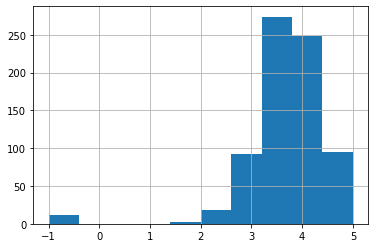

In [17]:
data.Rating.hist()